# COMP 472 - MP3

JustAlex
- Alexandre Lavoie (40129457)

This document covers analysis of datasets.

## Imports

In [204]:
import matplotlib.pyplot as plt
import pandas
import itertools
import numpy as np
import math

## Models

In [91]:
crowdsource = pandas.read_csv("./results/crowdsource.csv")
fasttext_wiki_300 = pandas.read_csv("./results/fasttext-wiki-news-subwords-300-details.csv")
glove_twitter_100 = pandas.read_csv("./results/glove-twitter-100-details.csv")
glove_twitter_200 = pandas.read_csv("./results/glove-twitter-200-details.csv")
glove_wiki_300 = pandas.read_csv("./results/glove-wiki-gigaword-300-details.csv")
word2vec_google_300 = pandas.read_csv("./results/word2vec-google-news-300-details.csv")

In [74]:
def extract_dataset(dataset):
    x, y = list(zip(*list(sorted(zip(
        dataset["question"],
        [100 if l == "correct" else 0 for l in dataset["label"]]
    )))))

    return list(x), list(y)

In [182]:
def graph_compare_models(names, labels, values):
    fig, ax = plt.subplots(figsize=(20,15))

    dataset = list(zip(names, labels, values))
    for name, label, value in dataset:
        ax.bar(label, [(1 if v == 100 else 0) for v in value], label=name)

    for i in range(2, len(dataset) + 1):
        for models in itertools.combinations(dataset, i):
            combo_label = models[0][1]
            combo_name = '-'.join(model[0] for model in models)
            combo_value = [i if all(v == 100 for v in mvs) else 0 for mvs in zip(*[model[2] for model in models])]
            ax.bar(combo_label, combo_value, label=combo_name)

    ax.set_ylabel("Success Count")
    ax.yaxis.grid(True)
    ax.set_yticks(list(range(1, len(names) + 1)))
    ax.legend()
    title_names = ' vs '.join(names)
    ax.set_title(f"Success of {title_names}")

    return fig, ax

In [218]:
def quick_standard_deviation(count, total, max):
    u = count / (max * total)
    return max * math.sqrt(u - u * u)

In [219]:
crowdsource_x, crowdsource_y, crowdsource_d = (
    crowdsource["Question Name"], 
    [float(v[:-1]) for v in crowdsource["Success Rate"]], 
    [float(v[:-1]) for v in crowdsource["Standard deviation"]]
)

fasttext_wiki_300_x, fasttext_wiki_300_y = extract_dataset(fasttext_wiki_300)
glove_twitter_100_x, glove_twitter_100_y = extract_dataset(glove_twitter_100)
glove_twitter_200_x, glove_twitter_200_y = extract_dataset(glove_twitter_200)
glove_wiki_300_x, glove_wiki_300_y = extract_dataset(glove_wiki_300)
word2vec_google_300_x, word2vec_google_300_y = extract_dataset(word2vec_google_300)

In [222]:
ai_models = [fasttext_wiki_300_y, glove_twitter_100_y, glove_twitter_200_y, glove_wiki_300_y, word2vec_google_300_y] 
ais_x = fasttext_wiki_300_x
ais_y = [(sum(v) / 5) for v in zip(*ai_models)]
ais_d = [quick_standard_deviation(sum(v), 5, 100) for v in zip(*ai_models)]

print(ais_d)

[0.0, 39.99999999999999, 0.0, 0.0, 0.0, 0.0, 48.98979485566356, 0.0, 0.0, 39.99999999999999, 0.0, 0.0, 48.98979485566356, 48.98979485566356, 0.0, 0.0, 48.98979485566356, 0.0, 0.0, 0.0, 0.0, 0.0, 48.98979485566356, 48.98979485566356, 40.0, 0.0, 48.98979485566356, 39.99999999999999, 0.0, 40.0, 48.98979485566356, 48.98979485566356, 0.0, 0.0, 48.98979485566356, 48.98979485566356, 0.0, 39.99999999999999, 48.98979485566356, 39.99999999999999, 0.0, 48.98979485566356, 39.99999999999999, 48.98979485566356, 48.98979485566356, 0.0, 48.98979485566356, 48.98979485566356, 48.98979485566356, 48.98979485566356, 48.98979485566356, 48.98979485566356, 39.99999999999999, 48.98979485566356, 48.98979485566356, 39.99999999999999, 48.98979485566356, 0.0, 0.0, 0.0, 48.98979485566356, 39.99999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 39.99999999999999, 0.0, 48.98979485566356, 39.99999999999999, 48.98979485566356, 48.98979485566356, 40.0, 48.98979485566356, 48.98979485566356, 0.0, 48.98979485566356, 0.0, 0.0]


## Glove Twitter

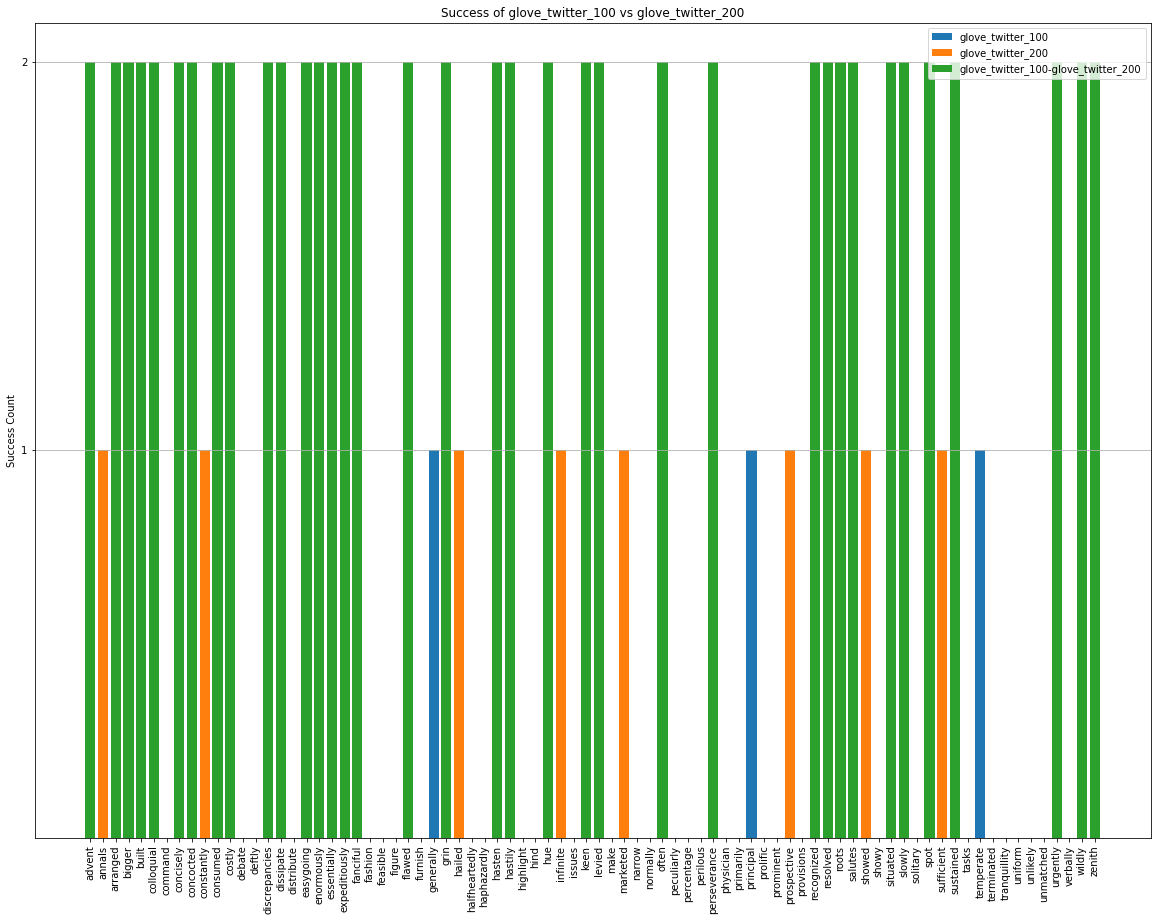

In [183]:
graph_compare_models(
    ["glove_twitter_100", "glove_twitter_200"], 
    [glove_twitter_100_x, glove_twitter_200_x], 
    [glove_twitter_100_y, glove_twitter_200_y]
)

plt.xticks(rotation=90)
plt.savefig("./graphs/glove_twitter_100-200.png", facecolor='white')
plt.show()

## FastText vs Glove

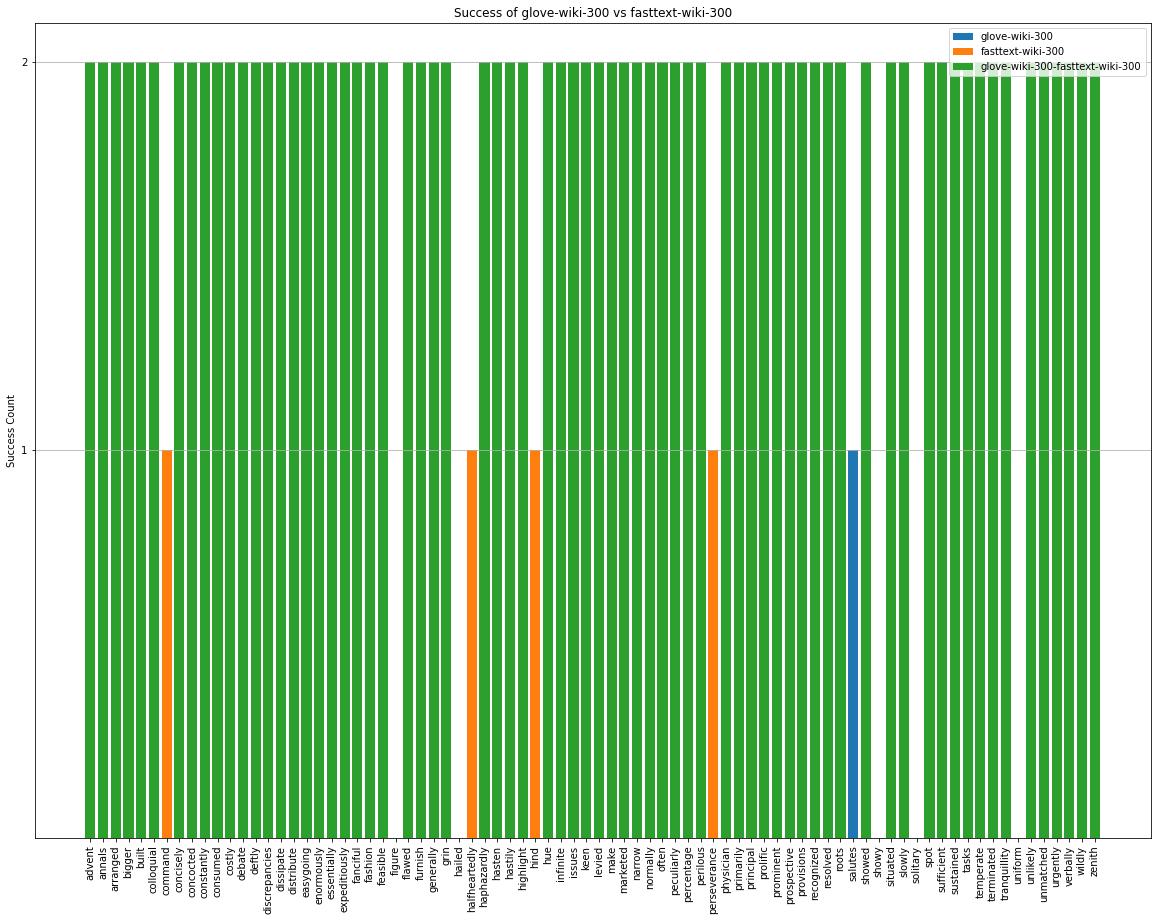

In [184]:
graph_compare_models(
    ["glove-wiki-300", "fasttext-wiki-300"], 
    [glove_wiki_300_x, fasttext_wiki_300_x], 
    [glove_wiki_300_y, fasttext_wiki_300_y]
)

plt.xticks(rotation=90)
plt.savefig("./graphs/glove-fasttext.png", facecolor='white')
plt.show()

## Crowdsource

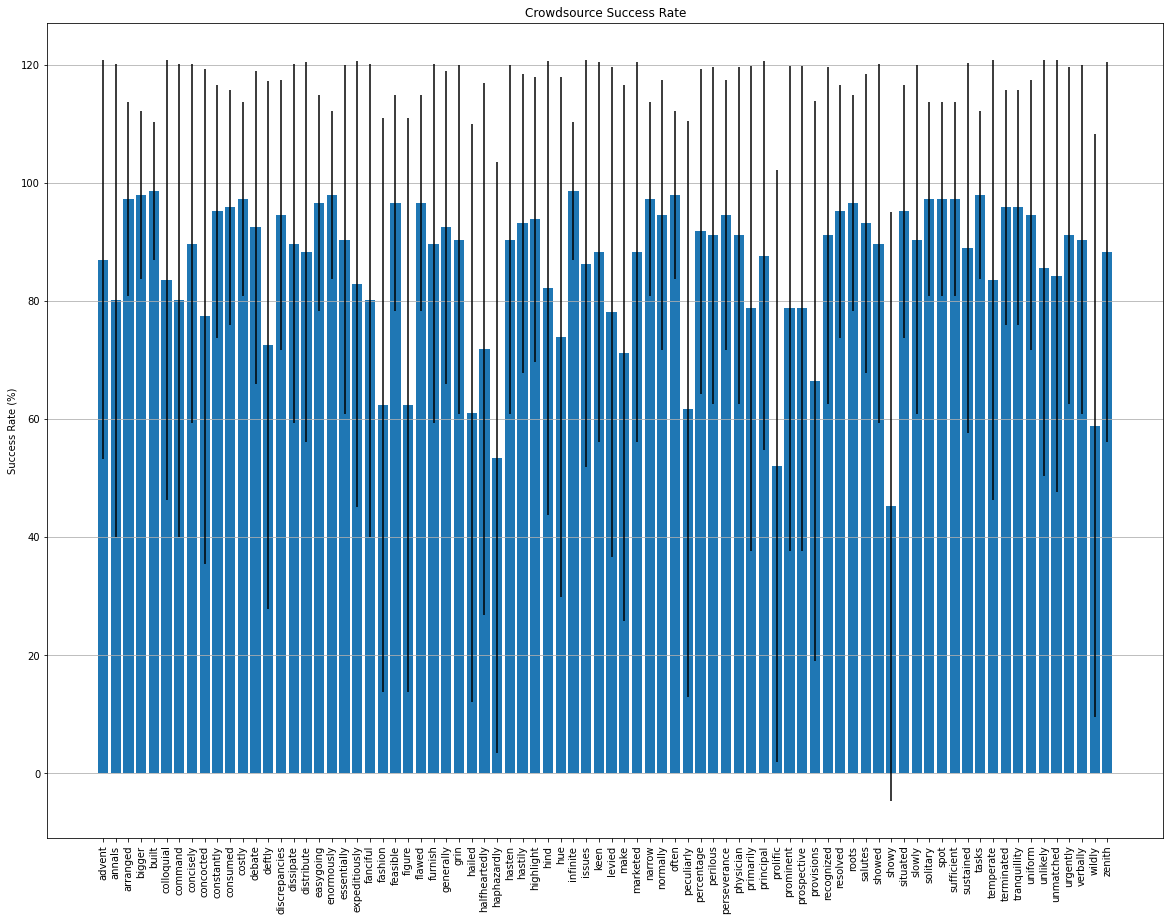

In [127]:
fig, ax = plt.subplots(figsize=(20,15))
ax.bar(crowdsource_x, crowdsource_y, yerr=crowdsource_d, align='center')
ax.set_ylabel('Success Rate (%)')
ax.set_title('Crowdsource Success Rate')
ax.yaxis.grid(True)

plt.xticks(rotation=90)
plt.savefig("./graphs/crowdsource.png", facecolor='white')
plt.show()

## Combo

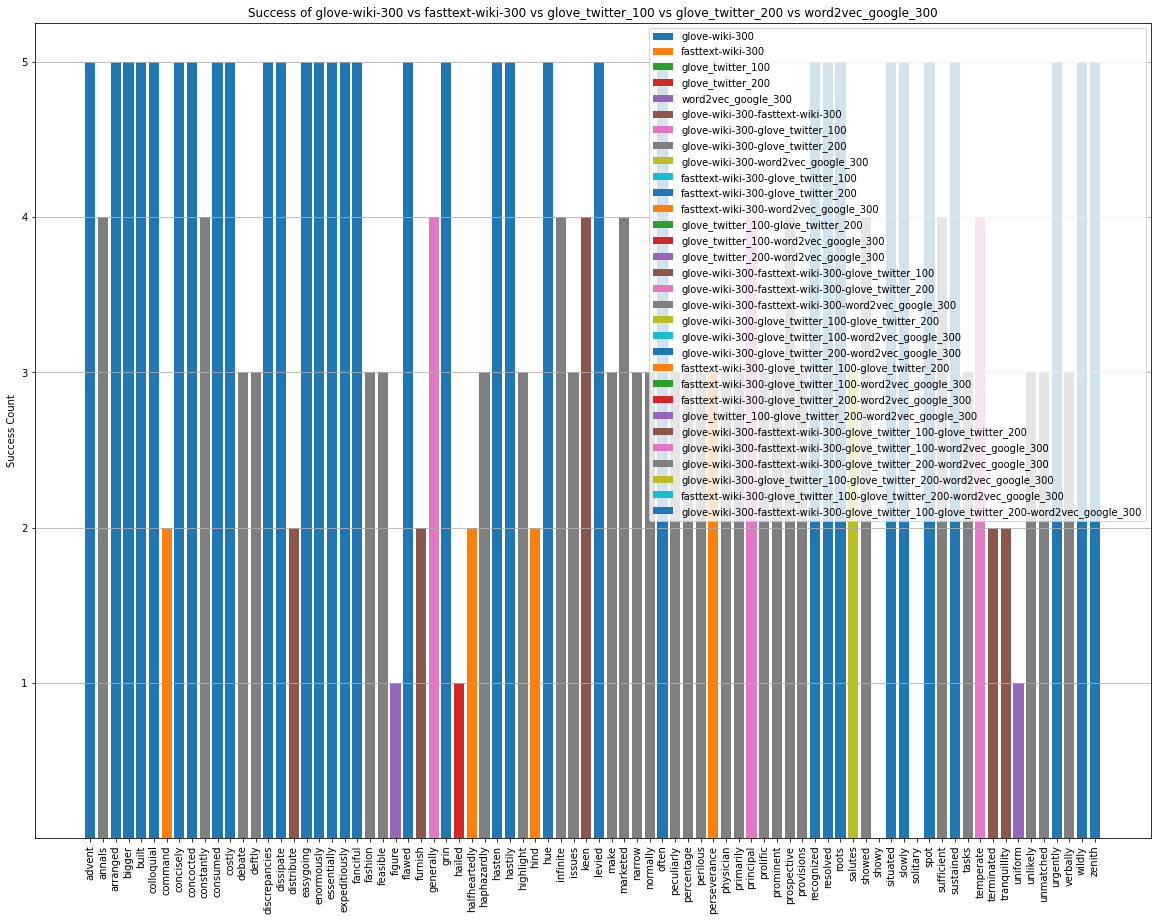

In [186]:
graph_compare_models(
    ["glove-wiki-300", "fasttext-wiki-300", "glove_twitter_100", "glove_twitter_200", "word2vec_google_300"], 
    [glove_wiki_300_x, fasttext_wiki_300_x, glove_twitter_100_x, glove_twitter_200_x, word2vec_google_300_x], 
    [glove_wiki_300_y, fasttext_wiki_300_y, glove_twitter_100_y, glove_twitter_200_y, word2vec_google_300_y]
)

plt.xticks(rotation=90)
plt.savefig("./graphs/all-ai.png", facecolor='white')
plt.show()

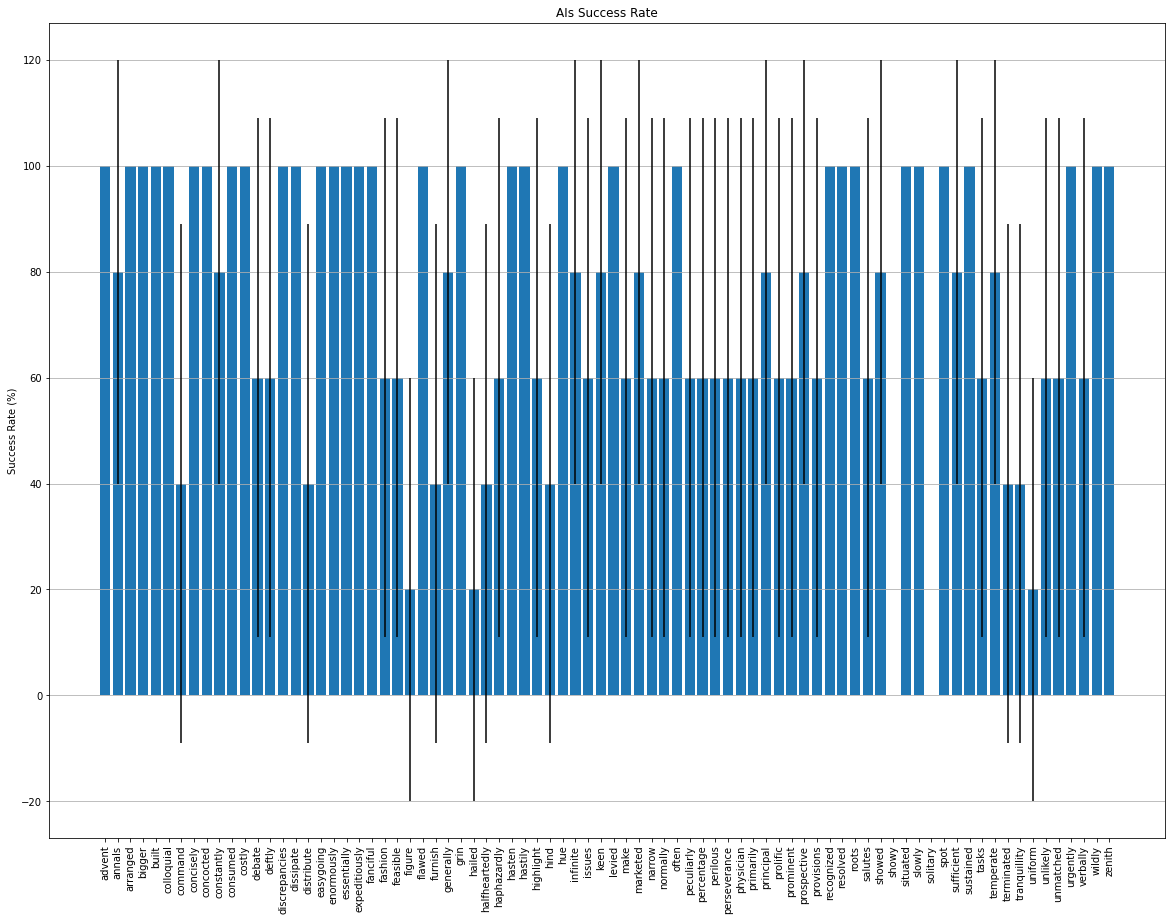

In [203]:
fig, ax = plt.subplots(figsize=(20,15))
ax.bar(ais_x, ais_y, yerr=ais_d, align='center')
ax.set_ylabel('Success Rate (%)')
ax.set_title('AIs Success Rate')
ax.yaxis.grid(True)

plt.xticks(rotation=90)
plt.savefig("./graphs/ais.png", facecolor='white')
plt.show()

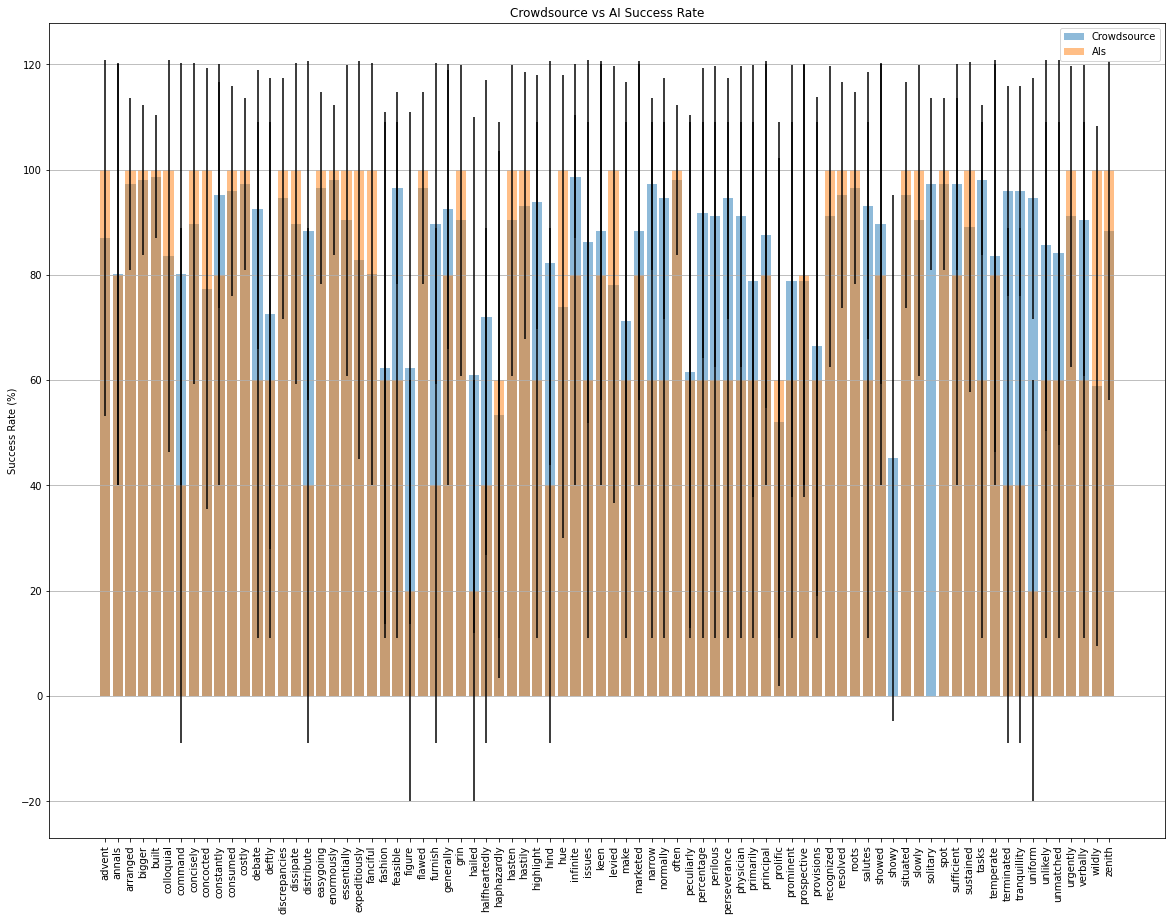

In [201]:
fig, ax = plt.subplots(figsize=(20,15))
ax.bar(crowdsource_x, crowdsource_y, yerr=crowdsource_d, align='center', label="Crowdsource", alpha=0.5)
ax.bar(ais_x, ais_y, yerr=ais_d, align='center', label="AIs", alpha=0.5)
ax.set_ylabel('Success Rate (%)')
ax.set_title('Crowdsource vs AI Success Rate')
ax.yaxis.grid(True)
ax.legend()

plt.xticks(rotation=90)
plt.savefig("./graphs/crowdsource-ai.png", facecolor='white')
plt.show()

Average Deviation: 10.147375000000002


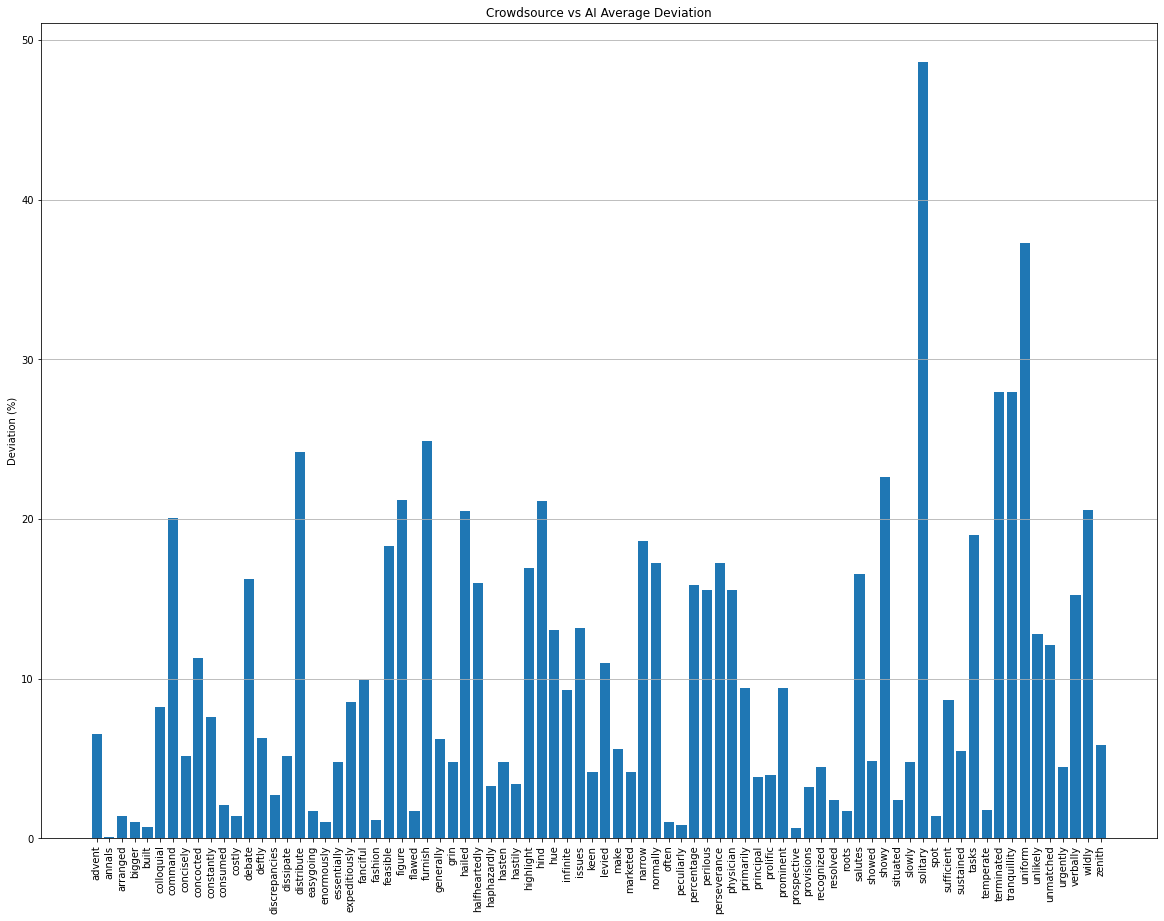

In [233]:
ai_crowd_d = np.std(list(zip(crowdsource_y, ais_y)),axis=1)

print("Average Deviation:", sum(ai_crowd_d) / len(ai_crowd_d))

fig, ax = plt.subplots(figsize=(20,15))
ax.bar(crowdsource_x, ai_crowd_d)
ax.set_ylabel('Deviation (%)')
ax.set_title('Crowdsource vs AI Average Deviation')
ax.yaxis.grid(True)

plt.xticks(rotation=90)
plt.savefig("./graphs/crowdsource-ai-deviation.png", facecolor='white')
plt.show()

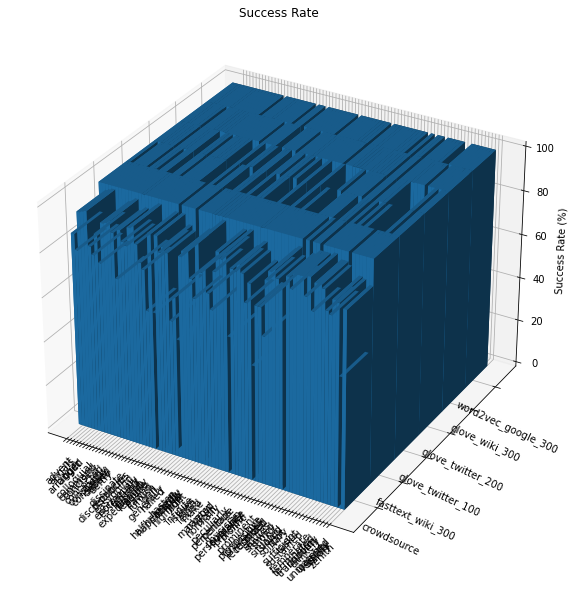

In [136]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

values = crowdsource_y + fasttext_wiki_300_y + glove_twitter_100_y + glove_twitter_200_y + glove_wiki_300_y + word2vec_google_300_y
word_count = len(crowdsource_x)
model_count = len(values) // word_count

ax.bar3d(
    list(range(word_count)) * model_count, 
    [n - 0.5 for i in range(model_count) for n in [i] * word_count], 
    [0] * len(values), 
    [1] * len(values), 
    [1] * len(values), 
    values
)

ax.set_xticks(list(range(word_count)))
ax.set_xticklabels(crowdsource_x)
ax.set_yticks(list(range(model_count)))
ax.set_yticklabels(["crowdsource", "fasttext_wiki_300", "glove_twitter_100", "glove_twitter_200", "glove_wiki_300", "word2vec_google_300"])
ax.set_zlabel("Success Rate (%)")
ax.set_title("Success Rate")
plt.xticks(rotation=45)
plt.yticks(rotation=-25)
plt.savefig("./graphs/all-3d.png", facecolor='white')
plt.show()